In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib.ticker as ticker

In [154]:
#load the data file
data = np.loadtxt("file2_Groups_AGN-wWU_500Mpc_Data.txt")

In [155]:
#extracting data for the next exercises
mass_tot = data[:,0]
gas_mass = data[:,1]
DM_mass = data[:,2]
stellar_mass = data[:,3]
BH_mass = data[:,4]
x = data[:,5]
y = data[:,6]
z = data[:,7]
coord = data[:, 5:8]

Plot of DM mass as a function of its baryonic mass (stellar mass + gas mass)

In [156]:
#Baryonic mass
B_mass = gas_mass + stellar_mass

In [157]:
#fitting model
def linear_fit(x,m,q):
    return m*x + q

In [158]:
#fit with scipy.optimize
popt, pcov = curve_fit(linear_fit, B_mass, DM_mass)                             
m, q = popt

x_fit = np.linspace(B_mass.min(), B_mass.max(), 100)           #linear fit in linear space
y_fit = linear_fit(x_fit, m, q)

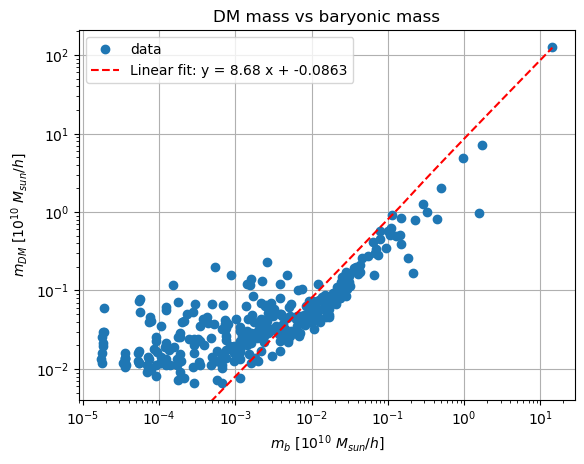

In [159]:
plt.loglog(B_mass, DM_mass, 'o', label='data')
plt.loglog(x_fit, y_fit, 'r--', label = f'Linear fit: y = {m:.3} x + {q:.3}')
plt.xlabel(r'$m_b\ [10^{10}\ M_{sun}/h]$')
plt.ylabel(r'$m_{DM}\ [10^{10}\ M_{sun}/h]$')
plt.title('DM mass vs baryonic mass')
plt.legend()
plt.grid()
plt.savefig('DM_vs_baryonic.png')
plt.show()

A log-log plot was chosen to better highlight the relationship between the DM mass and the corresponding baryonic mass.
A linear fit was added to the plot. Due to the small value of the parameter q, the fit appears nearly linear even in logarithmic scale.
Howerver, it does not seem to interpolate data very well. It quite fits for bigger baryonic masses (m_b > 1e8 M_sun/h), but then data spread 
over a wide range of baryonic masses, while DM mass is more range-limited. In this regime, a linear fit fails to represent well the underlying data.

Distance of structures from the most massive one

In [160]:
#selecting the most massive structure
idx_max = np.where(mass_tot == np.max(mass_tot))[0]    #index of the most massive structure

#extracting coordinates of the most massive structure
coord_max = coord[idx_max][0]                      #coordinates of the most massive structure

In [161]:
#distance between the most massive structure and the other ones
dist = np.zeros(len(data))                             #empty array for distances
for i in range(len(data)):
    coord_i = coord[i]                                 #extracting i-th structure coordinates
    dist[i] = math.dist(coord_i, coord_max)            #calculating distance between i-th structure and the most massive one

In [162]:
#removing the most massive structure from the plot
mask = np.arange(len(data)) != idx_max                 #false if idx=idx_max, true for every other index

dist_mask = dist[mask]
mass_tot_mask = mass_tot[mask]

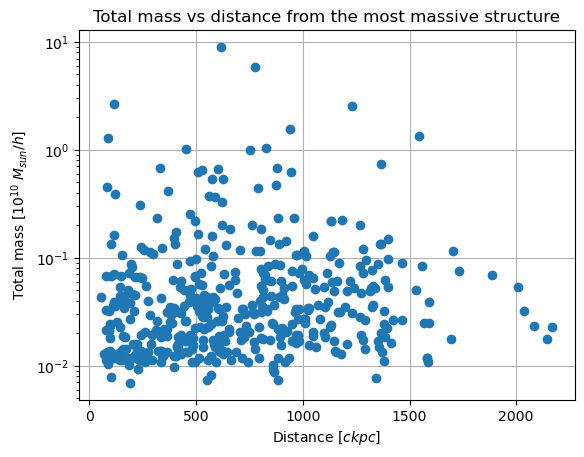

In [163]:
#plot of total mass vs distance
#plt.plot(dist_mask, mass_tot_mask, 'o')               #linear-linear scale plot
#plt.loglog(dist_mask, mass_tot_mask, 'o')             #log-log scale plot
#plt.semilogx(dist_mask, mass_tot_mask, 'o')           #log-linear scale plot
plt.semilogy(dist_mask, mass_tot_mask, 'o')            #linear-log scale plot
plt.xlabel(r'Distance $[ckpc]$')
plt.ylabel(r'Total mass $[10^{10}\ M_{sun}/h]$')
plt.title('Total mass vs distance from the most massive structure')
plt.grid()
plt.savefig('total_mass_vs_distance.png')
plt.show()

Histogram of the DM mass distribution of halos

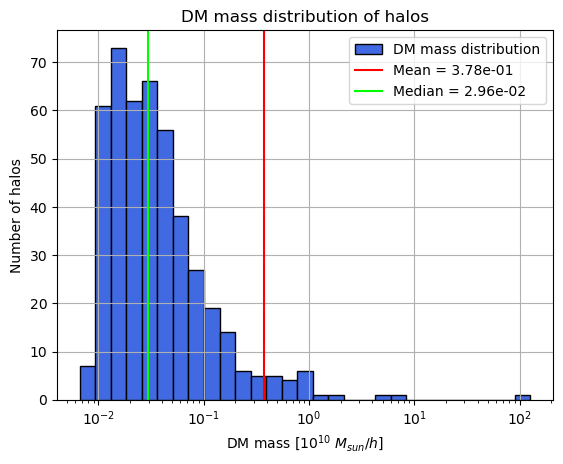

In [164]:
#creating the histogram
bins = np.logspace(np.log10(DM_mass.min()), np.log10(DM_mass.max()), 30) #defining the bins in log-space.

mean_mass = np.mean(DM_mass)                                             #mean value of DM mass
median_mass = np.median(DM_mass)                                         #median value of DM mass

plt.hist(DM_mass, bins=bins, color='royalblue', edgecolor='black', label='DM mass distribution')      #histogram
plt.xscale('log')
plt.xlabel(r'DM mass $[10^{10}\ M_{sun}/h]$')
plt.ylabel('Number of halos')
plt.title('DM mass distribution of halos')
plt.axvline(mean_mass, color='red', label=f'Mean = {mean_mass:.2e}')                                  #mean value
plt.axvline(median_mass, color='lime', label=f'Median = {median_mass:.2e}')                           #median value
plt.grid()
plt.legend()
plt.savefig('DM_distribution.png')
plt.show()

Projected distribution of the halos

In [165]:
#setting size to encode stellar mass
size = stellar_mass*500                            #size of the points that scales with stellar mass (rescaled)

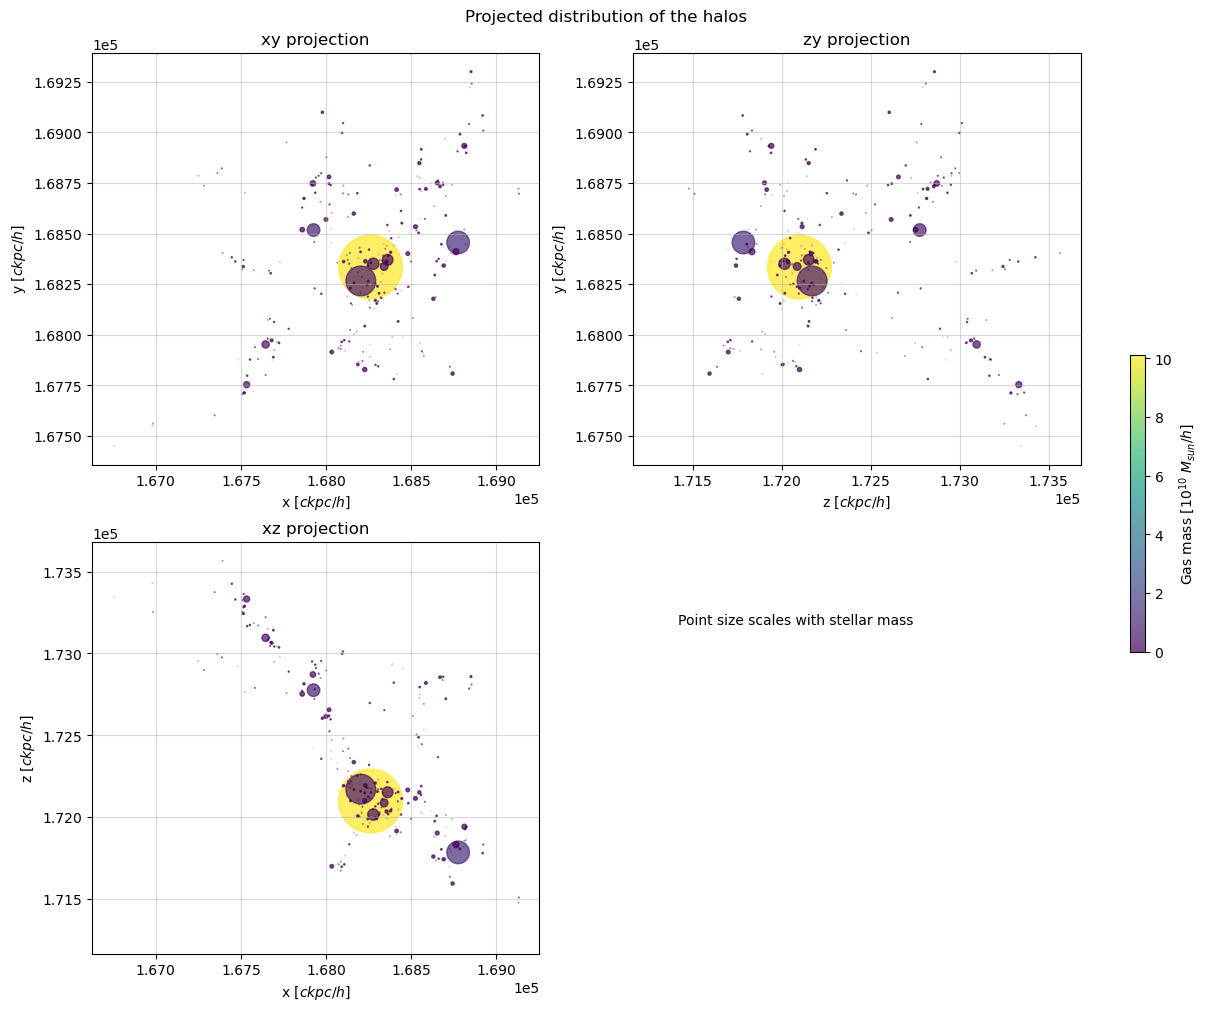

In [166]:
#plot of the distribution
fig, axs = plt.subplots(2, 2, figsize=(12,10), constrained_layout=True)
fig.suptitle('Projected distribution of the halos')

#xy plot
xy = axs[0,0].scatter(x, y, c=gas_mass, s=size, cmap='viridis', alpha=0.7)
axs[0,0].set_xlabel(r'x $[ckpc/h]$')
axs[0,0].set_ylabel(r'y $[ckpc/h]$')
axs[0,0].set_title('xy projection')
axs[0,0].grid(alpha=0.5)

#zy plot
zy = axs[0,1].scatter(z, y, c=gas_mass, s=size, cmap='viridis', vmin=gas_mass.min(), alpha=0.7)
axs[0,1].set_xlabel(r'z $[ckpc/h]$')
axs[0,1].set_ylabel(r'y $[ckpc/h]$')
axs[0,1].set_title('zy projection')
axs[0,1].grid(alpha=0.5)

#xz plot
xz = axs[1,0].scatter(x, z, c=gas_mass, s=size, cmap='viridis', alpha=0.7)
axs[1,0].set_xlabel(r'x $[ckpc/h]$')
axs[1,0].set_ylabel(r'z $[ckpc/h]$')
axs[1,0].set_title('xz projection')
axs[1,0].grid(alpha=0.5)

axs[1,1].axis('off')                                                #hide last empty panel axis
axs[1,1].text(0.1, 0.8, 'Point size scales with stellar mass')      #use empty space for text

#colorbar
cbar = fig.colorbar(xy, ax=axs, orientation='vertical', fraction=0.015, pad=0.05)
cbar.set_label(r'Gas mass $[10^{10}\ M_{sun}/h]$')

for ax in [axs[0,0], axs[0,1], axs[1,0]]:
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.savefig('projected_distribution.png')
plt.show()

Plot of BH mass vs Stellar mass

In [167]:
#defining threshold to filter halos
threshold_BH = 8e-5                           #8e5 M_sun/h in units of 1e10 M_sun/h

mask_BH = BH_mass > threshold_BH
BH_mass_mask = BH_mass[mask_BH]               #filtered BH mass
stellar_mass_mask = stellar_mass[mask_BH]     #corresponding filtered stellar mass

In [168]:
#fit with scipy.optimize

#linear fit in linear space
popt, pcov = curve_fit(linear_fit, stellar_mass_mask, BH_mass_mask)
m, q = popt

#linear fit in log-log space
logx = np.log10(stellar_mass_mask)
logy = np.log10(BH_mass_mask)
popt_log, pcov_log = curve_fit(linear_fit, logx, logy)
m_log, q_log = popt_log

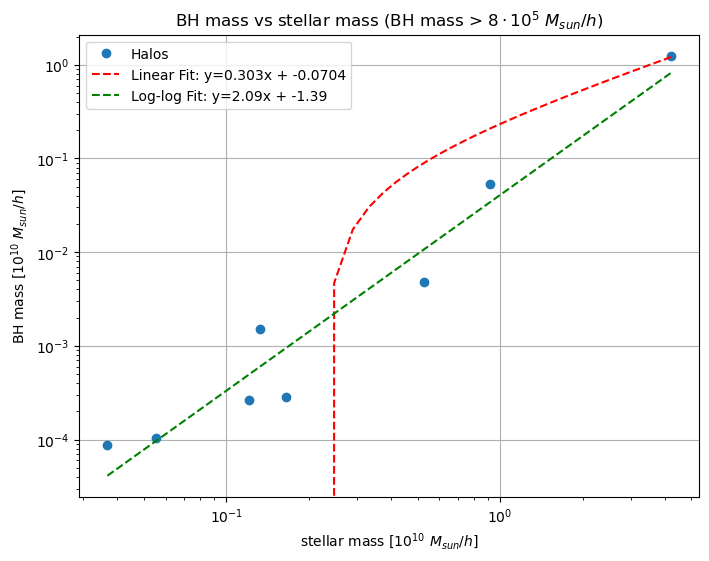

In [169]:
#plot of BH mass vs stellar mass in loglog

x_fit = np.linspace(stellar_mass_mask.min(), stellar_mass_mask.max(), 100)                           #linear fit in linear space
y_fit = linear_fit(x_fit, m, q)
x_fit_log = np.logspace(np.log10(stellar_mass_mask.min()), np.log10(stellar_mass_mask.max()), 100)   #linear fit in loglog space
y_fit_log = 10**linear_fit(np.log10(x_fit_log), m_log, q_log)

plt.figure(figsize=(8,6))
plt.loglog(stellar_mass_mask, BH_mass_mask, 'o', label='Halos')                                      #scatter plot
plt.loglog(x_fit, y_fit, 'r--', label=f'Linear Fit: y={m:.3}x + {q:.3}')                             #linear fit in linear space
plt.plot(x_fit_log, y_fit_log, 'g--', label=f'Log-log Fit: y={m_log:.3}x + {q_log:.3}')              #linear fit in loglog space

plt.xlabel(r'stellar mass $[10^{10}\ M_{sun}/h]$')
plt.ylabel(r'BH mass $[10^{10}\ M_{sun}/h]$')
plt.title(r'BH mass vs stellar mass (BH mass > $8\cdot10^5\ M_{sun}/h)$')
plt.legend()
plt.grid()
plt.savefig('BH_mass_vs_stellar_mass.png')
plt.show()

A log-log plot was chosen to better highlight the relationship between the BH mass and the corresponding stellar mass.
Two linear fits were added to the plot. The first one (red curve) was computed in linear space and plotted in log-log. Clearly, this fit is far from
the best representation of the underlying data, highlighting the fact that BH mass and stellar mass do not follow a linear relationship.
The second fit (green line), on the other hand, is 'linear' in log-log space and it seems to interpolate quite well the data, suggesting that BH mass
and stellar mass might follow a power law relationship.

Cumulative 2D histogram of number of halos vs total mass vs distance from other halos

In [147]:
#Filtering the halos to keep only the ones with a mass > 3.07e9 M_sun/h
threshold_tot = 3.07e-1                                    #3.07e9 in units of 1e10

mask_tot = mass_tot > threshold_tot
massive_halos_idx = np.where(mask_tot)[0]                  #indices of the massive halos
massive_halos_mass = mass_tot[massive_halos_idx]           #masses of the massive halos
massive_halos_coord = coord[massive_halos_idx]             #coordinates of the massive halos

In [148]:
#Extracting the 5 most massive halos
top_halos_idx = np.argsort(-massive_halos_mass)[:5]        #indices of the 5 most massive halos
top_halos_mass = massive_halos_mass[top_halos_idx]         #masses of the 5 most massive halos
top_halos_coord = massive_halos_coord[top_halos_idx]       #coordinates of the 5 most massive halos

In [149]:
#calculating distances between halos
distances = np.empty((len(top_halos_idx), len(massive_halos_idx)))                 #empty matrix for distances
for i in range(len(top_halos_idx)):
    for j in range(len(massive_halos_idx)):
        distances[i][j] = math.dist(top_halos_coord[i], massive_halos_coord[j])    #filling the matrix with distances

In [150]:
#creating the histogram
mass_bins = np.logspace(np.log10(massive_halos_mass.min()), np.log10(massive_halos_mass.max()*1.01), 20)     #common mass bins
dist_bins = np.linspace(0, distances.max()*1.01, 20)                                                         #common distance bins

hist_total = np.zeros((len(mass_bins)-1, len(dist_bins)-1))                                                  #creating the cumulative histogram

for i in range(len(top_halos_idx)):                                                                          #loop over the 5 most massive halos

    mask_other = np.arange(len(massive_halos_mass)) != top_halos_idx[i]                                      #removing the i-th halo
    mass_other = massive_halos_mass[mask_other]
    dist_other = distances[i][mask_other]
    
    H, xedges, yedges = np.histogram2d(mass_other, dist_other, bins=[mass_bins, dist_bins])                  #creating the histogram related to the i-th halo
    hist_total += H                                                                                          #the cumulative histogram is the sum of the 5 histograms

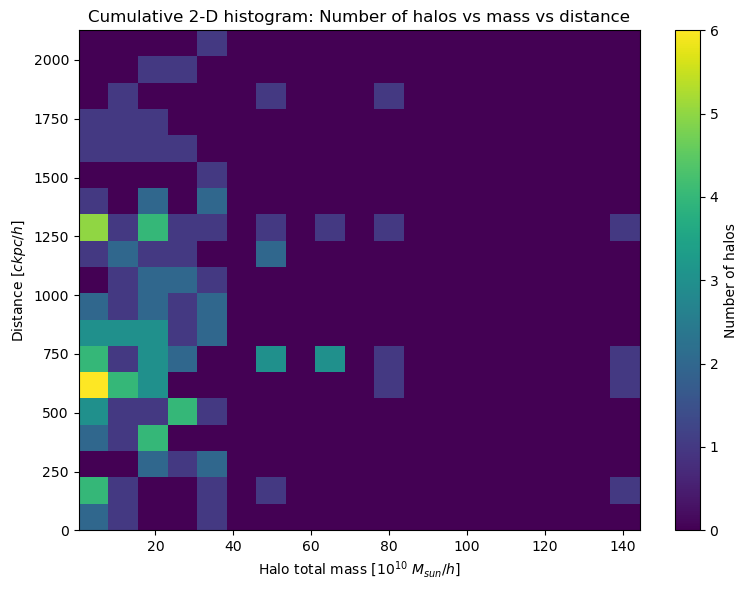

In [152]:
#plotting the histogram
plt.figure(figsize=(8,6))
plt.imshow(
    hist_total.T,
    origin = 'lower',
    aspect = 'auto',
    extent=[mass_bins[0], mass_bins[-1], dist_bins[0], dist_bins[-1]],
    cmap='viridis'
)
plt.colorbar(label='Number of halos')
plt.xlabel(r'Halo total mass $[10^{10}\ M_{sun}/h]$')
plt.ylabel(r'Distance $[ckpc/h]$')
plt.title('Cumulative 2-D histogram: Number of halos vs mass vs distance')
plt.tight_layout()
plt.savefig('cumulative_histogram.png')
plt.show()